<a href="https://colab.research.google.com/github/abiraaaaaaf/MachineLearning-Python-Introduction/blob/main/Session_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

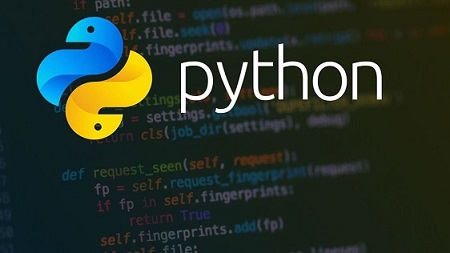

##Review (Classification vs. Regression)

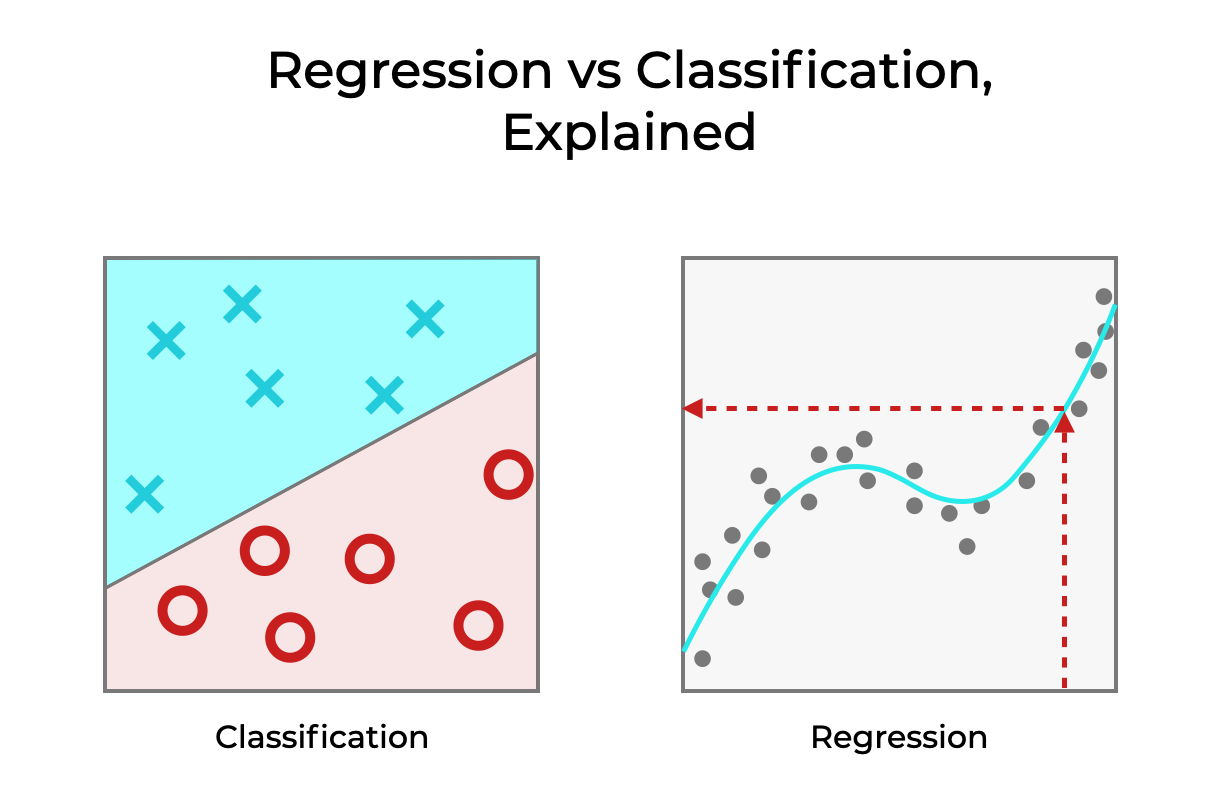


###SVM Regression

**numpy.newaxis** is used to increase the dimension of the existing array by one more dimension, when used once. Thus,

1D array will become 2D array

2D array will become 3D array

3D array will become 4D array

4D array will become 5D array


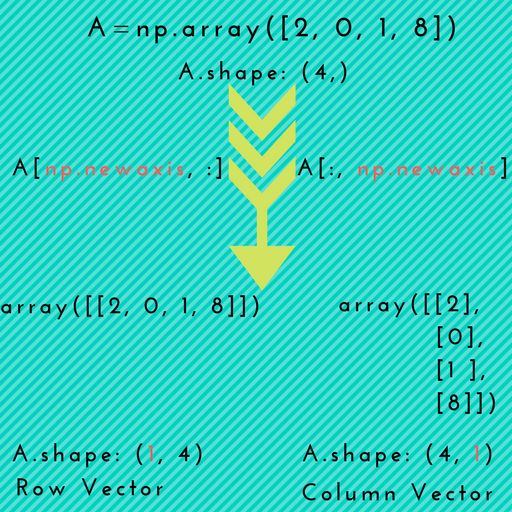

In [35]:
x_range = [-20, 60]

In [33]:
import numpy as np
np.random.seed(43)

In [41]:
x = (x_range[1] - x_range[0]) * np.random.rand(10) + x_range[0]
x

array([ 47.91513182,  57.71720731,  10.83015315,  56.35905001,
        15.66066887,  33.57797214, -13.39999602,  51.7678864 ,
         3.84028006,   0.98438581])

In [37]:
x = x[:, np.newaxis]
x

array([[-10.79563469],
       [ 28.72532314],
       [ -9.32872287],
       [ -0.7528304 ],
       [  6.17112446],
       [ 48.73099928],
       [ 33.28721705],
       [ 23.29297698],
       [-17.67889405],
       [ 38.6998637 ]])

In [40]:
x = x[..., np.newaxis]
x

array([[ 11.59600147],
       [ 44.16376949],
       [  0.35369007],
       [-15.44920507],
       [ 49.33189127],
       [ -2.31768033],
       [ 12.39915584],
       [  5.28771768],
       [-13.866984  ],
       [ 47.45797554]])

In [42]:
x = x[np.newaxis, ...]
x

array([[ 47.91513182,  57.71720731,  10.83015315,  56.35905001,
         15.66066887,  33.57797214, -13.39999602,  51.7678864 ,
          3.84028006,   0.98438581]])

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [43]:
np.linspace(2.0, 4.0, num=6)

array([2. , 2.4, 2.8, 3.2, 3.6, 4. ])

In [44]:
np.linspace(2, 10, num=5)

array([ 2.,  4.,  6.,  8., 10.])

In [6]:
np.linspace(3, 10, num=5)

array([ 3.  ,  4.75,  6.5 ,  8.25, 10.  ])

In [8]:
np.linspace(3, 10, num=9)

array([ 3.   ,  3.875,  4.75 ,  5.625,  6.5  ,  7.375,  8.25 ,  9.125,
       10.   ])

In [13]:
x = np.pi/2
np.sin(x)

1.0

In [14]:
np.cos(x)

6.123233995736766e-17

Machine limits for floating point types

In [17]:
np.finfo(float).eps

2.220446049250313e-16

In [45]:
import numpy as np

w0 = 0.125
b0 = 5.
x_range = [-20, 60]

def load_dataset(n=150, n_tst=150):
    np.random.seed(43)
    def s(x):
        g = (x - x_range[0]) / (x_range[1] - x_range[0])
        return 3 * (0.25 + g**2.)
    x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
    eps = np.random.randn(n) * s(x)
    y = (w0 * x * (1. + np.sin(x)) + b0) + eps
    x = x[..., np.newaxis]
    x_tst = np.linspace(*x_range, num=n_tst).astype(np.float32)
    x_tst = x_tst[..., np.newaxis]
    return y, x, x_tst

y, x, x_tst = load_dataset()

In [47]:
print(x)

[[-10.79563469]
 [ 28.72532314]
 [ -9.32872287]
 [ -0.7528304 ]
 [  6.17112446]
 [ 48.73099928]
 [ 33.28721705]
 [ 23.29297698]
 [-17.67889405]
 [ 38.6998637 ]
 [ 11.59600147]
 [ 44.16376949]
 [  0.35369007]
 [-15.44920507]
 [ 49.33189127]
 [ -2.31768033]
 [ 12.39915584]
 [  5.28771768]
 [-13.866984  ]
 [ 47.45797554]
 [ 47.91513182]
 [ 57.71720731]
 [ 10.83015315]
 [ 56.35905001]
 [ 15.66066887]
 [ 33.57797214]
 [-13.39999602]
 [ 51.7678864 ]
 [  3.84028006]
 [  0.98438581]
 [-19.58963607]
 [ 23.45620122]
 [ 18.04770936]
 [ 30.90989421]
 [ 58.25633073]
 [ 52.69302063]
 [ 52.81224606]
 [ 22.02045369]
 [-11.67848401]
 [ -5.52683238]
 [ 56.24321768]
 [ 12.95623867]
 [ 49.20136965]
 [ 33.77418236]
 [ 30.30286367]
 [  2.04470213]
 [ 51.73978158]
 [ -3.44869029]
 [ 12.35241945]
 [ 59.48579939]
 [ 38.85816652]
 [ 15.604913  ]
 [ 24.85305356]
 [ 12.90043913]
 [ 38.15903936]
 [ 11.93575087]
 [ 33.61161318]
 [ 36.37724863]
 [ 28.7647897 ]
 [ 23.20275713]
 [ -3.51345193]
 [ -4.06708187]
 [ 43.65

In [46]:
print(x.T)

[[-10.79563469  28.72532314  -9.32872287  -0.7528304    6.17112446
   48.73099928  33.28721705  23.29297698 -17.67889405  38.6998637
   11.59600147  44.16376949   0.35369007 -15.44920507  49.33189127
   -2.31768033  12.39915584   5.28771768 -13.866984    47.45797554
   47.91513182  57.71720731  10.83015315  56.35905001  15.66066887
   33.57797214 -13.39999602  51.7678864    3.84028006   0.98438581
  -19.58963607  23.45620122  18.04770936  30.90989421  58.25633073
   52.69302063  52.81224606  22.02045369 -11.67848401  -5.52683238
   56.24321768  12.95623867  49.20136965  33.77418236  30.30286367
    2.04470213  51.73978158  -3.44869029  12.35241945  59.48579939
   38.85816652  15.604913    24.85305356  12.90043913  38.15903936
   11.93575087  33.61161318  36.37724863  28.7647897   23.20275713
   -3.51345193  -4.06708187  43.65910919   3.22662222  32.47702623
    3.96934206  -8.44172973  12.31653336   4.82156215  -0.5281587
   27.04832341  -0.37253976  39.82164894  37.61173183  35.620869

In [ ]:
print(y)

[ 1.98290616  8.92418691  2.95533762  4.90177049  6.32389722  4.47223309
 12.94640849  3.7609858   0.50276347 15.60906287  2.7939086  11.09330204
  4.50791408  3.50958037 11.5353889   4.52245127  8.14181203  6.26145651
  4.9600662   9.23816334  7.25734809 15.89829439  5.76789482  8.5829232
  7.09824465  8.08014478  3.90003608 19.62008915  4.02936155  5.54494712
  3.8221094   6.63547769  7.43180303  7.33996016 19.44215404 16.03071837
 15.23143514  9.55195769  4.36771235  2.70400248  6.34310196  8.95144711
  2.35187262  9.31210287  9.48553746  5.21482246 17.11378049  3.99163641
  6.93744438  9.73990269 18.52078861  8.16354408  7.16132969  6.44758353
 12.1399871   6.89430873 18.09846316  8.51961078  8.7907198   5.25503785
  5.48265355  3.78442853  9.60352921  6.54314109 13.84158879  4.45325591
  3.57735991  6.78054115  5.14344867  5.8300278  11.66658252  4.61714934
 16.77523999 11.58850764  0.92051104  1.29830663  6.3388786   9.93861556
 17.33777299  4.77647851 14.35986085 13.01728682 10.

In [ ]:
print(x_tst.T)

[[-20.         -19.463087   -18.926174   -18.389261   -17.852348
  -17.315435   -16.778524   -16.241611   -15.704698   -15.167786
  -14.630873   -14.09396    -13.557047   -13.020134   -12.483221
  -11.946309   -11.409396   -10.872483   -10.33557     -9.798657
   -9.2617445   -8.724833    -8.18792     -7.6510067   -7.114094
   -6.5771813   -6.0402684   -5.5033555   -4.966443    -4.42953
   -3.8926175   -3.3557048   -2.8187919   -2.2818792   -1.7449664
   -1.2080537   -0.67114097  -0.13422818   0.40268457   0.9395973
    1.47651      2.0134227    2.5503356    3.0872483    3.624161
    4.1610737    4.6979866    5.2348995    5.771812     6.308725
    6.845638     7.3825502    7.919463     8.456376     8.993289
    9.530201    10.067114    10.604027    11.14094     11.677853
   12.214766    12.7516775   13.28859     13.825503    14.362416
   14.899329    15.436241    15.973154    16.510067    17.04698
   17.583893    18.120806    18.657719    19.194632    19.731544
   20.268456    20.805368

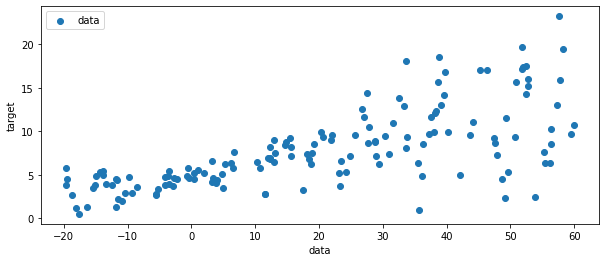

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 4])  # inches
plt.scatter(x, y, label='data')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm

lw = 2

clf_p_linear = svm.SVR(kernel='linear', C=1e3)   # Linear Kernel   / C is Regularization Parameter
clf_p_linear.fit(x, y)
y_test_linear = clf_p_linear.predict(x_tst)

In [ ]:
clf_p_poly3 = svm.SVR(kernel="poly", degree=3, epsilon=.1, coef0=1) # Polynomial Kernel
clf_p_poly3.fit(x, y)
y_test_poly3 = clf_p_poly3.predict(x_tst)

In [ ]:
reg_rbf = svm.SVR(kernel="rbf", C=100, gamma=0.1) # RBF Kernel
reg_rbf.fit(x, y)
y_test_rbf = reg_rbf.predict(x_tst)

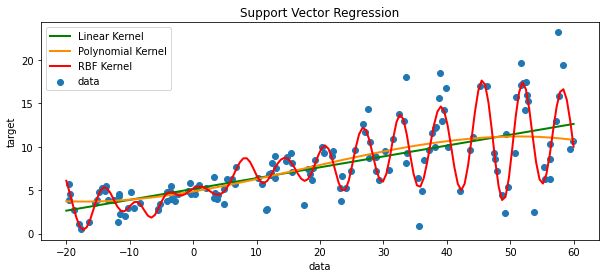

In [ ]:
plt.figure(figsize=[10, 4])  # inches
plt.scatter(x, y, label='data')
plt.plot(x_tst, y_test_linear, color='green', lw=lw, label='Linear Kernel')
plt.plot(x_tst, y_test_poly3, color='darkorange', lw=lw, label='Polynomial Kernel')
plt.plot(x_tst, y_test_rbf, color='red', lw=lw, label='RBF Kernel')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Decision Tree Regression

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
dataset = pd.read_csv('petrol_consumption.csv')

In [50]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [51]:
dataset

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [54]:
X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
y_pred = regressor.predict(X_test)

In [58]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,554.0
30,571,554.0
32,577,554.0
37,704,574.0
34,487,628.0
40,587,525.0
7,467,414.0
10,580,464.0


In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 58.2
Mean Squared Error: 5842.2
Root Mean Squared Error: 76.43428550068353


In [21]:
num = 100
avg = 15
print("Avg score of %d students: %d" %(num, avg))

Avg score of 100 students: 15


In [22]:
num = 100
avg = 15.675
print("Avg score of %d students: %f" %(num, avg))

Avg score of 100 students: 15.675000


# Naive Bayes Classification

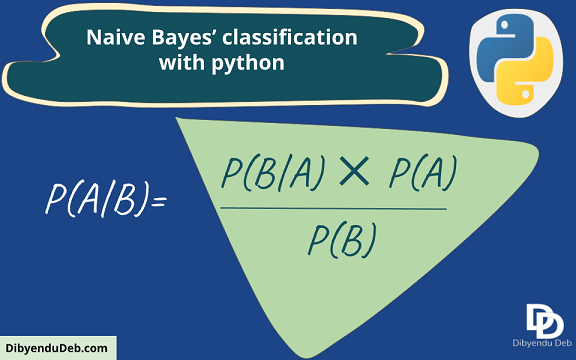

# Gaussian Naive Bayes Classification

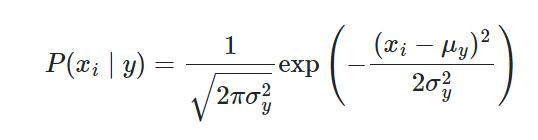

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [24]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


In [25]:
print("Number of labeled points out of a total %d points : %d" % (X_test.shape[0], (y_test == y_pred).sum()))

Number of labeled points out of a total 75 points : 71


## Another Example:
Loading Data


In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [ ]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [ ]:
wine.data.shape

(178, 13)

In [ ]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [ ]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


#LDA

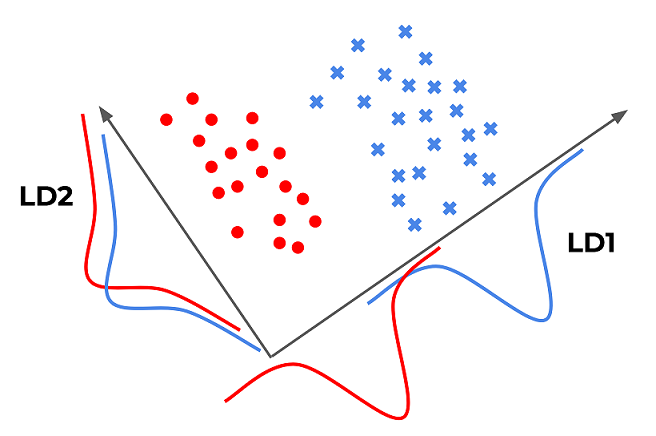

How to classify wine using sklearn LDA and QDA model in ML in python


In [60]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use("ggplot")

from sklearn import discriminant_analysis

In [61]:
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [62]:
X_train

array([[1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.272e+01, 1.750e+00, 2.280e+00, ..., 8.800e-01, 2.420e+00,
        4.880e+02],
       [1.277e+01, 3.430e+00, 1.980e+00, ..., 7.000e-01, 2.120e+00,
        3.720e+02],
       ...,
       [1.369e+01, 3.260e+00, 2.540e+00, ..., 9.600e-01, 1.820e+00,
        6.800e+02],
       [1.371e+01, 5.650e+00, 2.450e+00, ..., 6.400e-01, 1.740e+00,
        7.400e+02],
       [1.237e+01, 1.210e+00, 2.560e+00, ..., 1.190e+00, 2.300e+00,
        6.780e+02]])

In [63]:
y_train

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2,
       1])

In [ ]:
model = discriminant_analysis.LinearDiscriminantAnalysis()   # LDA
model.fit(X_train, y_train)
print(model)

LinearDiscriminantAnalysis()


In [ ]:
expected_y  = y_test
predicted_y = model.predict(X_test) 

In [ ]:
print(metrics.classification_report(expected_y, predicted_y, target_names=dataset.target_names))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.95      0.97        19
     class_2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 1 18  0]
 [ 0  0 12]]


In [64]:
# Program: Clustering for Wine dataset using LDA

import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn import datasets
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [65]:
# Loading Wine Dataset 

wine = datasets.load_wine()

X = wine.data
y = wine.target
target_names = wine.target_names

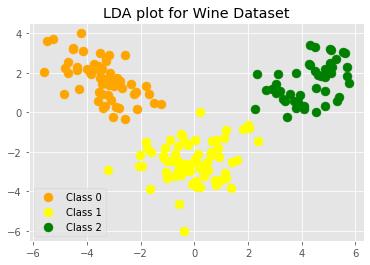

In [66]:
# fitting the LDA model
lda = LDA(n_components=2)
lda_X = lda.fit(X,y).transform(X)

plt.scatter(lda_X[y == 0, 0], lda_X[y == 0, 1], s =80, c = 'orange', label = 'Class 0')
plt.scatter(lda_X[y == 1, 0], lda_X[y == 1, 1], s =80,  c = 'yellow', label = 'Class 1')
plt.scatter(lda_X[y == 2, 0], lda_X[y == 2, 1], s =80,  c = 'green', label = 'Class 2')
plt.title('LDA plot for Wine Dataset')
plt.legend()

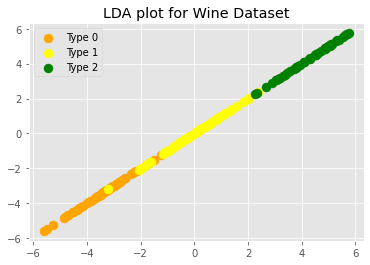

In [67]:
# fitting the LDA model
lda = LDA(n_components=1)
lda_X = lda.fit(X,y).transform(X)

plt.scatter(lda_X[y == 0], lda_X[y == 0], s =80, c = 'orange', label = 'Type 0')
plt.scatter(lda_X[y == 1], lda_X[y == 1], s =80,  c = 'yellow', label = 'Type 1')
plt.scatter(lda_X[y == 2], lda_X[y == 2], s =80,  c = 'green', label = 'Type 2')
plt.title('LDA plot for Wine Dataset')
plt.legend()

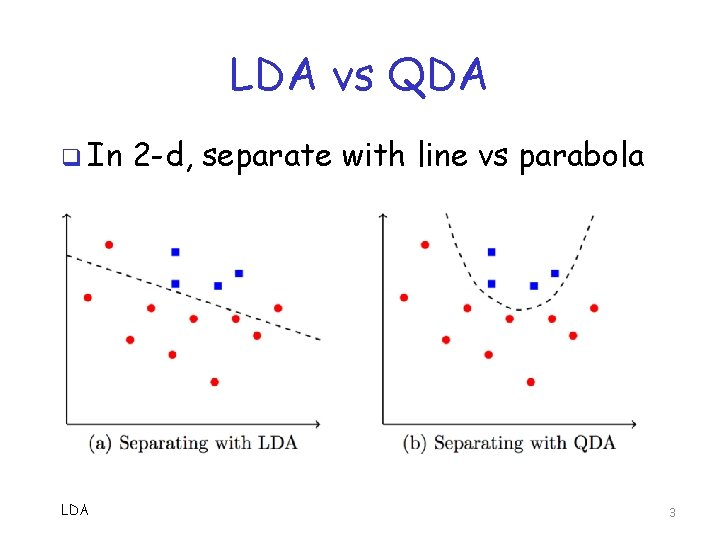

#Assignments

- Generate the first dataset in this session again and plot the output with polynomial degree 2,3,6,9,10.

- Load datasets.load_diabetes and train and test it with SVM Regression and Decision Tree Regression. Use different metrics to evaluate error.
